# 2D Burgers' Equation

We can now treat the full 2D Burgers's equation numerically. Burgers' equation gives the full nonlinear treatment to fluid flow, and can develop discontinuities from an initial smooth solution, which is to say it can develop "shocks." The coupled set of PDEs is shown below:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = \nu \; \left(\frac{\partial ^2 u}{\partial x^2} + \frac{\partial ^2 u}{\partial y^2}\right)$$

$$\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = \nu \; \left(\frac{\partial ^2 v}{\partial x^2} + \frac{\partial ^2 v}{\partial y^2}\right)$$

The fully solved discretization is below:

$$\begin{split}
u_{i,j}^{n+1} = & u_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (u_{i,j}^n - u_{i-1,j}^n)  - \frac{\Delta t}{\Delta y} v_{i,j}^n (u_{i,j}^n - u_{i,j-1}^n) \\
&+ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n-2u_{i,j}^n+u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n)
\end{split}$$

$$\begin{split}
v_{i,j}^{n+1} = & v_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (v_{i,j}^n - v_{i-1,j}^n) - \frac{\Delta t}{\Delta y} v_{i,j}^n (v_{i,j}^n - v_{i,j-1}^n) \\
&+ \frac{\nu \Delta t}{\Delta x^2}(v_{i+1,j}^n-2v_{i,j}^n+v_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n)
\end{split}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [10]:
###variable declarations
nx = 41
ny = 41
nt = 120
c = 1
L = 2
dx = L / (nx - 1)
dy = L / (ny - 1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu

In [11]:
x = np.linspace(0, L, nx)
y = np.linspace(0, L, ny)

In [12]:
u = np.ones((nx, ny))
v = np.ones((nx, ny))
comb = np.ones((nx, ny))

In [13]:
u[int(0.5/dx):int(1/dx+1), int(0.5/dy):int(1/dy+1)] = 2
v[int(0.5/dx):int(1/dx+1), int(0.5/dy):int(1/dy+1)] = 2

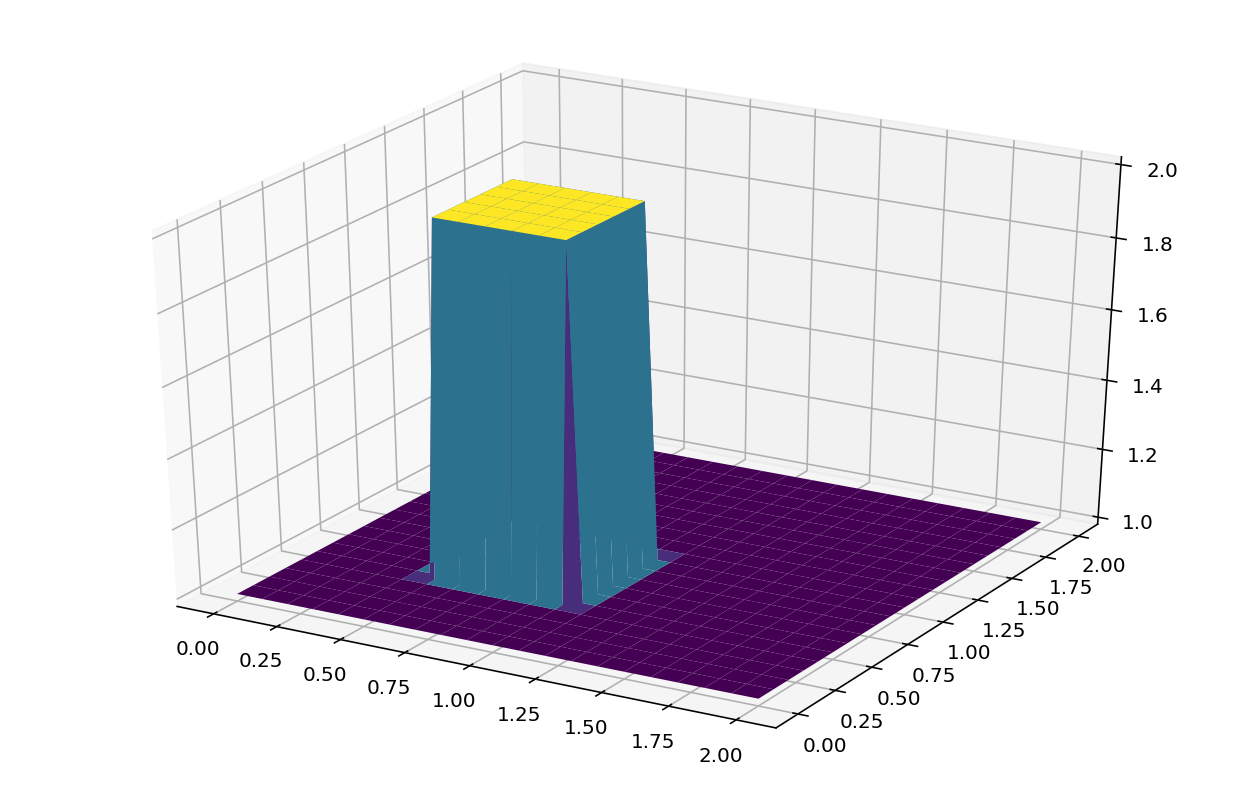

In [14]:
fig = plt.figure(figsize=(11,7))
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, cmap=cm.viridis, cstride=2, rstride=2)

$$\begin{split}
u_{i,j}^{n+1} = & u_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (u_{i,j}^n - u_{i-1,j}^n)  - \frac{\Delta t}{\Delta y} v_{i,j}^n (u_{i,j}^n - u_{i,j-1}^n) \\
&+ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n-2u_{i,j}^n+u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n)
\end{split}$$

$$\begin{split}
v_{i,j}^{n+1} = & v_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (v_{i,j}^n - v_{i-1,j}^n) - \frac{\Delta t}{\Delta y} v_{i,j}^n (v_{i,j}^n - v_{i,j-1}^n) \\
&+ \frac{\nu \Delta t}{\Delta x^2}(v_{i+1,j}^n-2v_{i,j}^n+v_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n)
\end{split}$$

In [95]:
def burgers(nt):
    # Variable declarations
    nx = 41
    ny = 41
    c = 1
    L = 2
    dx = L / (nx - 1)
    dy = L / (ny - 1)
    sigma = .0009
    nu = 0.01
    dt = sigma * dx * dy / nu
    # Create x and y coordinate vectors
    x = np.linspace(0, L, nx)
    y = np.linspace(0, L, ny)
    # Create vectors for storing velocities
    u = np.ones((nx, ny))
    v = np.ones((nx, ny))
    comb = np.ones((nx, ny))
    # Create initial conditions
    u[int(0.5/dx):int(1/dx+1), int(0.5/dy):int(1/dy+1)] = 2
    v[int(0.5/dx):int(1/dx+1), int(0.5/dy):int(1/dy+1)] = 2
    ## MAIN LOOP ##
    for n in range(nt+1):
        un = np.copy(u)
        vn = np.copy(v)
        u[1:-1, 1:-1] = (un[1:-1,1:-1] - dt/dx * un[1:-1,1:-1] * (un[1:-1,1:-1] - un[:-2, 1:-1]) -  
        dt/dy * vn[1:-1,1:-1] * (un[1:-1,1:-1] - un[1:-1, :-2]) + 
        nu*dt/dx**2 * (un[2:,1:-1] - 2*un[1:-1,1:-1] + un[:-2,1:-1]) + 
        nu*dt/dy**2 * (un[1:-1, 2:] - 2*un[1:-1,1:-1] + un[1:-1,:-2]))
        
        v[1:-1, 1:-1] = (vn[1:-1,1:-1] - dt/dx * un[1:-1,1:-1] * (vn[1:-1,1:-1] - vn[:-2, 1:-1]) - 
        dt/dy * vn[1:-1,1:-1] * (vn[1:-1,1:-1] - vn[1:-1, :-2]) + 
        nu*dt/dx**2 * (vn[2:,1:-1] - 2*vn[1:-1,1:-1] + vn[:-2,1:-1]) + 
        nu*dt/dy**2 * (vn[1:-1, 2:] - 2*vn[1:-1,1:-1] + vn[1:-1,:-2]))
        
        # Boundary conditions
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
        v[0, :] = 1
        v[-1, :] = 1
        v[:, 0] = 1
        v[:, -1] = 1
    fig = plt.figure(figsize=(11,7))
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, v, cmap=cm.hot, cstride=1, rstride=1)
    
    fig1, ax1 = plt.subplots(figsize=(11,7))
    cp = ax1.contourf(X, Y, v, cmap=cm.hot, levels=11)
    fig1.colorbar(cp)
    fig2, ax2 = plt.subplots(figsize=(11,7))
    q = ax2.quiver(X, Y, u, v)
    cont = ax2.contour(X, Y, v, levels=11)
    ax2.clabel(cont, fontsize=10)
    
    #ax.clabel(cp, inline=1, fontsize=10)

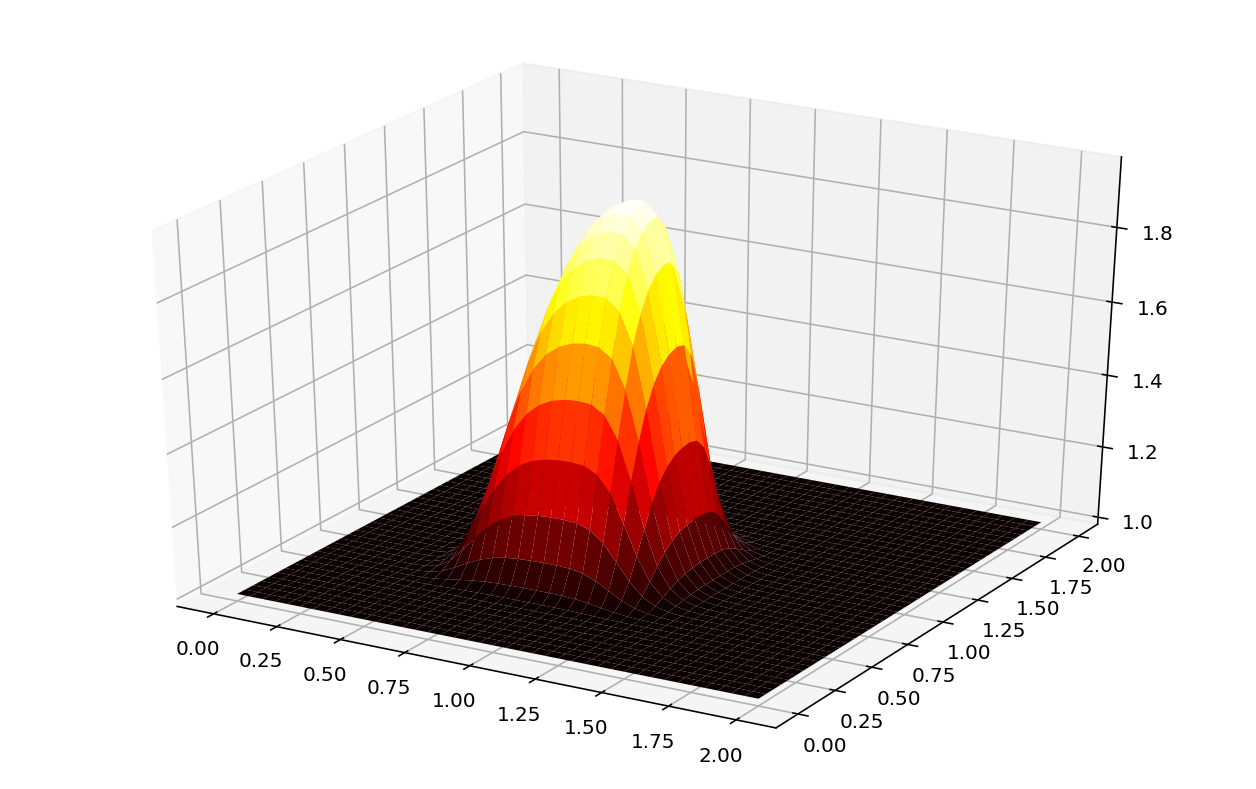

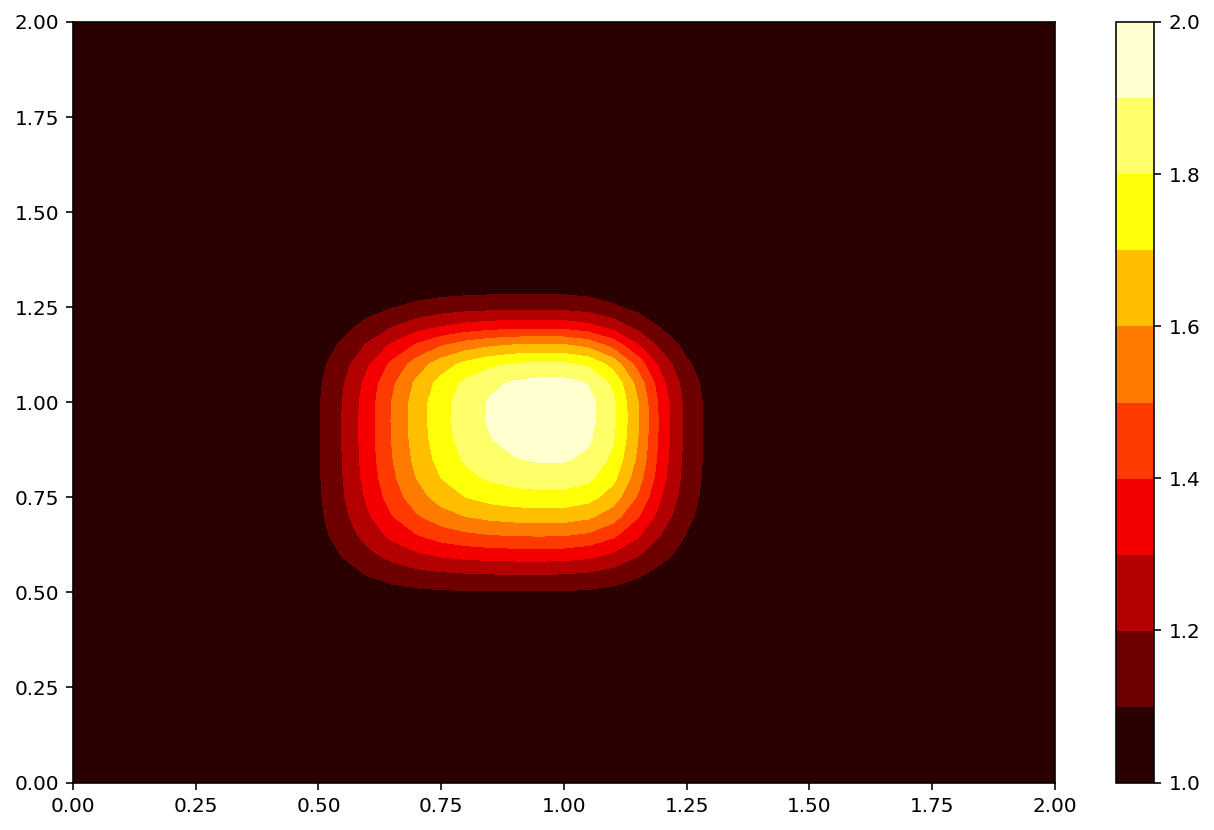

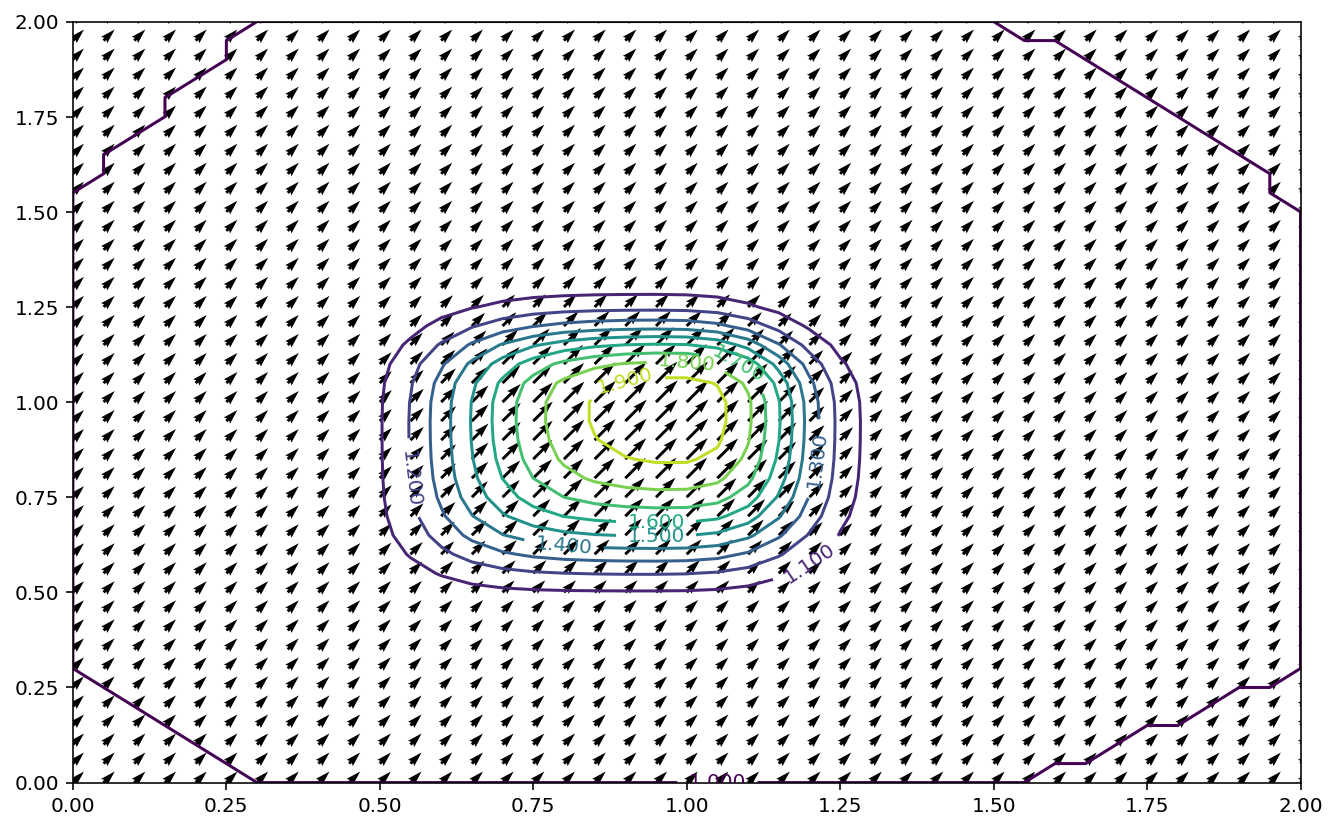

In [97]:
burgers(500)